In [1]:
from random import randint
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
VOLUMES = 1000 
# number of locations in which to place civilizations (Cubes)
MAX_CIVS = 5000 
# maximum number of advanced civilizations 
# (We aren't going to start off looking at 5,000, starting at 2 civilizations and randomly assign them to one of the locations)
TRIALS = 1000 
# number of times to model a given number of civilizations
# (In order to come up with a probability that makes sense)
CIV_STEP_SIZE = 100 
# civilizations count step size
# (Since we start at 2, we step up by 100 each time to try and limit the amount of time/memory usage.) 
# Step 1: 2 and run 1,000 times, Step 2: 102 etc. 

In [29]:
x = [] 
# x values for polynomial fit 
# Civilizations per volume (Step 1: x = 2 / 1000) .002 which makes it very unlikely that they will be sharing the same cube (detectable). 
y = [] 
# y values for polynomial fit
# After we randomly assigning the civilization to locations 1,000 times, 
# we will know the probability of the civilizations being able to detect one another. 

In [30]:
for num_civs in range(2, MAX_CIVS + 2, CIV_STEP_SIZE):
# Need to start at 2 because if there was 1, there would be ZERO probability of detection. 
    number_of_single_civs = 0
    civs_per_volume = num_civs / VOLUMES
    for trial in range(TRIALS):
        locations = []
        while len(locations) < num_civs:
            # Keep adding to locations until it is equal to the num_civs we have. 
            # If we are testing 102 civilizations, we only want there to be 102 possible locations.
            location = randint(1, VOLUMES)
            locations.append(location)
            # Append the location to the locations list, keep adding so long as the # is less than num_civs. 
        overlap_count = Counter(locations)
        count_of_values = Counter(overlap_count.values())
        number_of_single_civs = number_of_single_civs + count_of_values[1]
#         if num_civs == 102:
#             print("trial " + str(trial) + ": " + str(locations) + "\n" + str(overlap_count))
#             print("Occurences: " + str(count_of_values))
#             print("Number of Single Civilizations: " + str(count_of_values[1]))
#             print("Probability of Single: " + str(count_of_values[1]/num_civs))
#             single_prob = count_of_values[1]/num_civs
#             detect_prob = 1 - single_prob 
#             print("Probability of Detection: " + str(detect_prob))
#             print()
    detection_prob = 1 - (number_of_single_civs/(num_civs * TRIALS))
#     print("Civilizations per Volume: " + str(civs_per_volume))
#     print("Probability of Detection/Probability of 2 or more civilizations in one location: " + str(detection_prob))
#     print(num_civs)
#     print()
    x.append(civs_per_volume)
    y.append(detection_prob)
# for x, y in zip(x, y):
#     print(x, y)
    
            
"""
Example: 
trial 0: [983, 273]
Counter({983: 1, 273: 1})
trial 1: [668, 591]
Counter({668: 1, 591: 1})
trial 2: [167, 30]
Counter({167: 1, 30: 1})
trial 3: [231, 691]
Counter({231: 1, 691: 1})
trial 4: [959, 623]
Counter({959: 1, 623: 1})
trial 5: [202, 687]
Counter({202: 1, 687: 1})

Example of what we are looking for: 
trial 432: [300, 300]
Counter({300: 2})

"""

"""
With 102 as the number of Civs: 7 occurences of 2 civilations in the same cube, thus detectable. 
trial 0: [907, 50, 431, 504, 388, 574, 553, 863, 392, 603, 585, 401, 118, 837, 712, 601, 490, 391, 594, 875, 265, 134, 431, 280, 653, 926, 859, 429, 453, 643, 207, 601, 946, 186, 51, 175, 699, 58, 617, 616, 462, 331, 968, 592, 382, 566, 759, 708, 769, 884, 531, 172, 857, 133, 3, 37, 372, 894, 493, 984, 439, 707, 934, 560, 509, 909, 364, 428, 758, 244, 629, 946, 454, 836, 585, 911, 807, 327, 975, 819, 846, 524, 769, 412, 947, 448, 533, 616, 353, 488, 395, 916, 601, 798, 534, 984, 238, 235, 41, 270, 689, 155]
Counter({601: 3, 431: 2, 585: 2, 946: 2, 616: 2, 769: 2, 984: 2, 907: 1, 50: 1, 504: 1, 388: 1, 574: 1, 553: 1, 863: 1, 392: 1, 603: 1, 401: 1, 118: 1, 837: 1, 712: 1, 490: 1, 391: 1, 594: 1, 875: 1, 265: 1, 134: 1, 280: 1, 653: 1, 926: 1, 859: 1, 429: 1, 453: 1, 643: 1, 207: 1, 186: 1, 51: 1, 175: 1, 699: 1, 58: 1, 617: 1, 462: 1, 331: 1, 968: 1, 592: 1, 382: 1, 566: 1, 759: 1, 708: 1, 884: 1, 531: 1, 172: 1, 857: 1, 133: 1, 3: 1, 37: 1, 372: 1, 894: 1, 493: 1, 439: 1, 707: 1, 934: 1, 560: 1, 509: 1, 909: 1, 364: 1, 428: 1, 758: 1, 244: 1, 629: 1, 454: 1, 836: 1, 911: 1, 807: 1, 327: 1, 975: 1, 819: 1, 846: 1, 524: 1, 412: 1, 947: 1, 448: 1, 533: 1, 353: 1, 488: 1, 395: 1, 916: 1, 798: 1, 534: 1, 238: 1, 235: 1, 41: 1, 270: 1, 689: 1, 155: 1})
Occurences: Counter({1: 87, 2: 6, 3: 1})
Number of Single Civilizations: 87
Probability of Single: 0.8529411764705882
Probability of Detection: 0.1470588235294118
"""
"""
Civilizations per Volume: 0.002
Probability of Detection/Probability of 2 or more civilizations in one location: 0.0
2

Civilizations per Volume: 0.102
Probability of Detection/Probability of 2 or more civilizations in one location: 0.09383333333333332
102

Civilizations per Volume: 0.202
Probability of Detection/Probability of 2 or more civilizations in one location: 0.18506930693069312
202

Civilizations per Volume: 0.302
Probability of Detection/Probability of 2 or more civilizations in one location: 0.2588245033112583
302

Civilizations per Volume: 0.402
Probability of Detection/Probability of 2 or more civilizations in one location: 0.33115422885572143
402

Civilizations per Volume: 0.502
Probability of Detection/Probability of 2 or more civilizations in one location: 0.3945398406374502
502
"""

'\nCivilizations per Volume: 0.002\nProbability of Detection/Probability of 2 or more civilizations in one location: 0.0\n2\n\nCivilizations per Volume: 0.102\nProbability of Detection/Probability of 2 or more civilizations in one location: 0.09383333333333332\n102\n\nCivilizations per Volume: 0.202\nProbability of Detection/Probability of 2 or more civilizations in one location: 0.18506930693069312\n202\n\nCivilizations per Volume: 0.302\nProbability of Detection/Probability of 2 or more civilizations in one location: 0.2588245033112583\n302\n\nCivilizations per Volume: 0.402\nProbability of Detection/Probability of 2 or more civilizations in one location: 0.33115422885572143\n402\n\nCivilizations per Volume: 0.502\nProbability of Detection/Probability of 2 or more civilizations in one location: 0.3945398406374502\n502\n'

In [32]:
coefficients = np.polyfit(x, y, 4)
#4th order polynomial fit
print(coefficients)

[-0.00472715  0.06646121 -0.35903529  0.91888654  0.00976095]


In [34]:
p = np.poly1d(coefficients)
print(p)
#p stands for probability

           4           3         2
-0.004727 x + 0.06646 x - 0.359 x + 0.9189 x + 0.009761


In [36]:
xp = np.linspace(0, 5)
print(xp)
#Setting up our X Axis

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


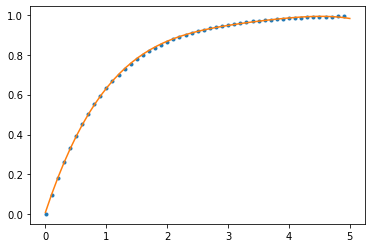

In [43]:
graph = plt.plot(x, y, ".", xp, p(xp), '-')
plt.show()

In [ ]:
# You can see how the equation we came up with is really close to the actual points that we found. 